# Линейная алгебра: сходство текстов и аппроксимация функций

Вы научитесь:
* читать тексты из файла с помощью Python и разбивать их на слова;
* переводить тексты в векторные пространства, вычислять расстояния в этих пространствах;
* решать системы линейных уравнений;
* приближать любые функции с помощью многочленов;

## Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

### Инструкция по выполнению

Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

* кошки (животные)
* UNIX-утилита cat для вывода содержимого файлов
* версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [18]:
import math
import re

import numpy as np
import pandas as pd

In [2]:
with open("sentences.txt") as f:
    text = list(f).copy()
    sentences = list(
        map(
            lambda x: [word for word in re.split("[^a-z]", x.lower().strip()) if word],
            text,
        )
    )

    text = " ".join([sentence.lower().strip() for sentence in text])
    tokens = [word for word in re.split("[^a-z]", text) if word]

In [41]:
# file = open('sentences.txt', 'r')
# sentences = list(map(lambda x: re.split("[^a-z]", x.lower().strip()), file))
# text = ' '.join([sentence.lower().strip() for sentence in file])
# tokens = [word for word in re.split('[^a-z]', text) if word]
# # for line in f:
# #     line = line.rstrip()
# #     print(repr(line))
# # x = f.read()
# # print(repr(x))

# file.close()

In [42]:
# with open('sentences.txt') as f:
#     sentences = ' '.join([sentence.lower().strip() for sentence in f])
#     tokens = [word for word in re.split('[^a-z]', sentences) if word]

In [43]:
# print(sentences)
# print(tokens)

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

In [10]:
different_words = list(set(tokens))

In [11]:
len(different_words)

254

In [12]:
dict_with_words = {}

for i, word in enumerate(different_words):
    dict_with_words[i] = word
print(dict_with_words)

{0: 'with', 1: 'mac', 2: 'files', 3: 'switch', 4: 'released', 5: 'installation', 6: 'and', 7: 'no', 8: 'every', 9: 'versions', 10: 'symbol', 11: 'faint', 12: 'three', 13: 'place', 14: 'drive', 15: 'major', 16: 'as', 17: 'mid', 18: 'flow', 19: 'members', 20: 'cat', 21: 'useful', 22: 'october', 23: 'bytes', 24: 'online', 25: 'rather', 26: 'just', 27: 'releases', 28: 'has', 29: 'streams', 30: 'commands', 31: 'two', 32: 'count', 33: 'command', 34: 'recent', 35: 'predecessor', 36: 'was', 37: 'later', 38: 't', 39: 'frequency', 40: 'when', 41: 'intel', 42: 'incremental', 43: 'update', 44: 'process', 45: 'made', 46: 's', 47: 'july', 48: 'dogs', 49: 'terms', 50: 'pipes', 51: 'interactive', 52: 'often', 53: 'learned', 54: 'separate', 55: 'arguments', 56: 'sounds', 57: 'the', 58: 'delete', 59: 'changes', 60: 'tiger', 61: 'similar', 62: 'installs', 63: 'deliberately', 64: 'lion', 65: 'upgrade', 66: 'genus', 67: 'run', 68: 'predators', 69: 'domestic', 70: 'patch', 71: 'animals', 72: 'possess', 73: 

In [13]:
matrix = np.array(
    [
        [sentences[sentence[0]].count(word) for word in different_words]
        for sentence in enumerate(sentences)
    ]
)

In [14]:
from scipy.spatial import distance

In [15]:
print(matrix)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]]


In [16]:
dist = []
for row in range(1, len(matrix)):
    dist.append(distance.cosine(matrix[0], matrix[row]))

In [17]:
print(dist)

[0.9527544408738466, 0.8644738145642124, 0.8951715163278082, 0.7770887149698589, 0.9402385695332803, 0.7327387580875756, 0.9258750683338899, 0.8842724875284311, 0.9055088817476932, 0.8328165362273942, 0.8804771390665607, 0.8396432548525454, 0.8703592552895671, 0.8740118423302576, 0.9442721787424647, 0.8406361854220809, 0.956644501523794, 0.9442721787424647, 0.8885443574849294, 0.8427572744917122, 0.8250364469440588]


In [97]:
df = pd.DataFrame(dist, columns = ['distance'])

In [104]:
answer_1 = df.sort_values(by=['distance']).index[:2]

In [106]:
with open("submission-1.txt", "w") as file_1:
    for element in answer_1:
        file_1.write(str(element + 1) + ' ')

## Задание 2

Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

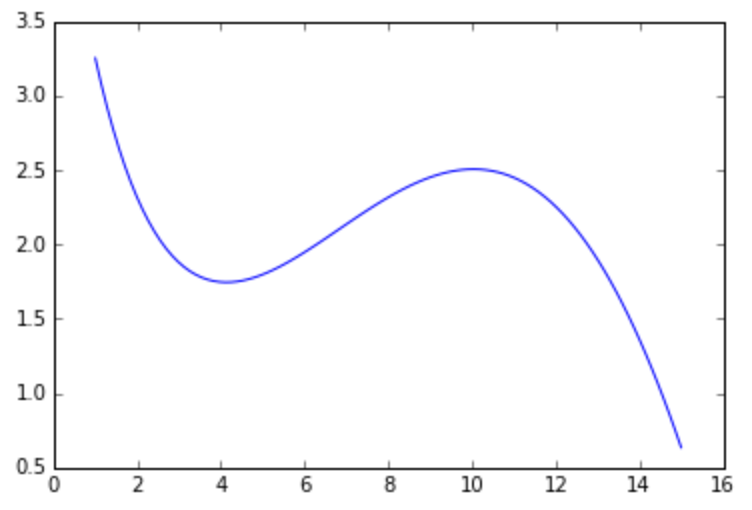

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

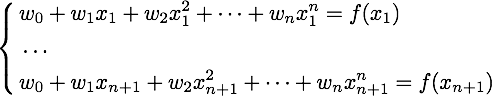

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [19]:
def f_x(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [26]:
f_x(10.0)

2.5054164070002463

In [36]:
A = np.array([[1, 1], [1, 15]])

In [37]:
A

array([[ 1,  1],
       [ 1, 15]])

In [38]:
b = np.array([f_x(1), f_x(15)])

In [39]:
b

array([3.25221687, 0.63522142])

In [40]:
from scipy import linalg

In [57]:
coef = linalg.solve(A, b)

In [58]:
%matplotlib inline
import seaborn as sns

sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

In [59]:
x_data = np.arange(1, 15, 0.1)

In [60]:
y_data = [f_x(x) for x in x_data]

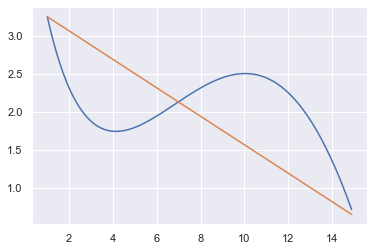

In [64]:
plt.plot(x_data, y_data, x_data, y_data_polynom_1)

In [53]:
def polynom_1(coefficients, x):
    return coefficients[0] * 1 + coefficients[1] * x

In [70]:
y_data_polynom_1 = [polynom_1(coef, x) for x in x_data]

In [75]:
A_2 = np.array([[1, 1 ** 1, 1 ** 2], [1, 8 ** 1, 8 ** 2], [1, 15 ** 1, 15 ** 2]])

In [77]:
b_2 = np.array([f_x(1), f_x(8), f_x(15)])

In [78]:
coef_2 = linalg.solve(A_2, b_2)

In [79]:
coef_2

array([ 3.32512949, -0.06531159, -0.00760104])

In [80]:
def polynom_2(coefficients, x):
    return coefficients[0] * 1 + coefficients[1] * x ** 1 + coefficients[2] * x ** 2

In [81]:
y_data_polynom_2 = [polynom_2(coef_2, x) for x in x_data]

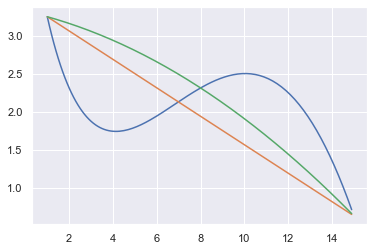

In [82]:
plt.plot(x_data, y_data, x_data, y_data_polynom_1, x_data, y_data_polynom_2)

In [83]:
A_3 = np.array([[1, 1 ** 1, 1 ** 2, 1 ** 2], [1, 4 ** 1, 4 ** 2, 4 ** 3], [1, 10 ** 1, 10 ** 2, 10 ** 3], [1, 15 ** 1, 15 ** 2, 15 ** 3]])

In [84]:
b_3 = np.array([f_x(1), f_x(4), f_x(10), f_x(15)])

In [85]:
coef_3 = linalg.solve(A_3, b_3)

In [86]:
def polynom_3(coefficients, x):
    return coefficients[0] * 1 + coefficients[1] * x ** 1 + coefficients[2] * x ** 2 + coefficients[3] * x ** 3

In [87]:
y_data_polynom_3 = [polynom_3(coef_3, x) for x in x_data]

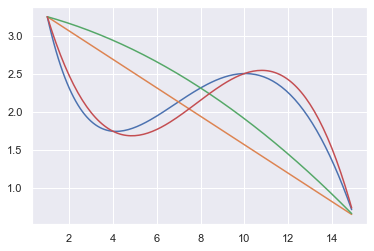

In [88]:
plt.plot(x_data, y_data, x_data, y_data_polynom_1, x_data, y_data_polynom_2, x_data, y_data_polynom_3)

In [94]:
with open("submission-2.txt", "w") as file_2:
    for element in coef_3:
        file_2.write(str(element) + ' ')